In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PLEASE GO THROUGH THE INITIAL PREPROCESSING FIRST BEFORE CONTINUING

In [ ]:
df_og= pd.read_csv("/content/drive/MyDrive/Health Insurance Analysis and predictions/Health_insurance.csv")
df = df_og.copy()

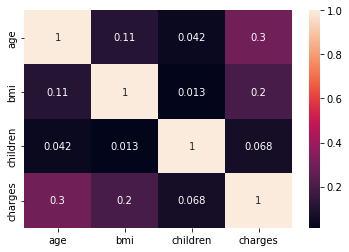

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df["children"] = df["children"].astype(object)

In [ ]:
sex_le = LabelEncoder()
df['sex'] = sex_le.fit_transform(df['sex'])

smoker_le = LabelEncoder()
df['smoker'] = smoker_le.fit_transform(df['smoker'])

region_le = LabelEncoder()
df['region'] = region_le.fit_transform(df['region'])

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
sex_map = dict(zip(sex_le.classes_, sex_le.transform(sex_le.classes_)))
print(sex_map)
smoker_map = dict(zip(smoker_le.classes_, smoker_le.transform(smoker_le.classes_)))
print(smoker_map)
region_map = dict(zip(region_le.classes_, region_le.transform(region_le.classes_)))
print(region_map)

{'female': 0, 'male': 1}
{'no': 0, 'yes': 1}
{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


In [ ]:
df.info()
## some categorical columns like region, sex, etc are now treated as numerical ones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [ ]:
df["sex"] = df["sex"].astype(object)
df["smoker"] = df["smoker"].astype(object)
df["region"] = df["region"].astype(object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [ ]:
input = df.drop(['charges'], axis = 1)
target = df['charges']

### Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree = 2)
## Degree can be changed to explore further and improve performance

In [ ]:
x_poly = poly.fit_transform(input)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_poly, target, test_size = 0.2, random_state = 0)

In [ ]:
## Feature scaling by Standardization

sscaler = StandardScaler()
X_train = sscaler.fit_transform(X_train.astype(float))
X_test = sscaler.transform(X_test.astype(float))

In [ ]:
poly_lr = LinearRegression(fit_intercept = True)

In [ ]:
poly_lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

In [ ]:
print("Polynomial reg coefficients: {}".format(poly_lr.coef_))
print("Polynomial reg intercept: {}".format(poly_lr.intercept_))

print("\n")
print("Polynomial reg train set accuracy score: {}".format(poly_lr.score(X_train, Y_train)))
print("\n")
print("Polynomial reg test set accuracy score: {}".format(poly_lr.score(X_test, Y_test)))
print("\n")
print(f"RMSE for train set = {np.sqrt(mean_squared_error(Y_train, y_train_pred))}")
print("\n")
print(f"RMSE for test set = {np.sqrt(mean_squared_error(Y_test, y_test_pred))}")

Polynomial reg coefficients: [-7.03681677e-10 -7.97463276e+02 -3.86344830e+02  3.57098159e+03
  1.36369359e+03 -3.91989245e+03 -9.80080740e+01  3.39454986e+03
  4.15408895e+02  6.96915584e+02  1.00598345e+02  5.95120112e+01
  8.56568561e+02 -3.86344830e+02  2.90425099e+02 -3.71843297e+02
 -1.74073846e+02  2.69973517e+02 -3.54767942e+03  6.06878404e+02
  1.79135624e+04 -1.60783244e+03 -5.02674210e+02 -2.95843100e+02
 -6.30859571e+02 -3.91989245e+03  2.31219973e+02  4.69102868e+02]
Polynomial reg intercept: 13201.18205600932


Polynomial reg train set accuracy score: 0.8361406746149914


Polynomial reg test set accuracy score: 0.8813175103251999


RMSE for train set = 4846.842342174146


RMSE for test set = 4345.795682064104


Thus we can see that polynomial Regression performs better than Linear regression in this case

In [ ]:
residuals = Y_test - y_test_pred

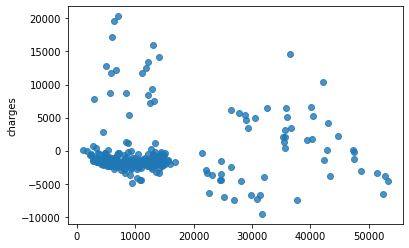

In [ ]:
sns.regplot(x =  y_test_pred, y= residuals, scatter = True, fit_reg= False)

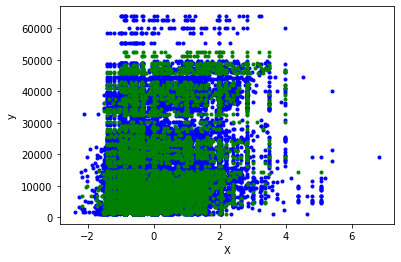

In [ ]:
# plt.plot(X_test, y_test_pred , "r-", linewidth=2, label="Predictions")
plt.plot(X_train, Y_train, "b.",label='Training points')
plt.plot(X_test, Y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.show()